# 1 Intrduction 

In [32]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
import pickle
import warnings
from scipy.stats import skew
from scipy.stats import norm
from scipy import stats
#Model 
from sklearn.preprocessing import StandardScaler 
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina'

# 2 Préparation des données

In [33]:
path = '/Users/qsted/Desktop/'
file = path+'labeled_dataset_axaggpdsc.csv'
data = pd.read_csv(file, sep= ',', encoding='latin-1', index_col=0)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
Age                                983 non-null float64
Prime mensuelle                    989 non-null float64
Categorie socio professionnelle    1000 non-null object
Kilometres parcourus par mois      1000 non-null int64
Coefficient bonus malus            1000 non-null int64
Type de vehicule                   1000 non-null object
Score CRM                          1000 non-null int64
Niveau de vie                      1000 non-null int64
Marque                             948 non-null object
Salaire annuel                     1000 non-null int64
Score credit                       1000 non-null int64
Cout entretien annuel              1000 non-null int64
Benefice net annuel                1000 non-null float64
dtypes: float64(3), int64(7), object(3)
memory usage: 109.4+ KB


In [35]:
#On affiche quelques éléments du dataset
data.head()

Age  Prime mensuelle Categorie socio professionnelle  \
index                                                          
0      58.0             40.0                        Etudiant   
1      26.0             27.0                         Ouvrier   
2      27.0             26.0                           Cadre   
3      22.0              8.0                        Etudiant   
4      60.0             20.0                     Sans emploi   

       Kilometres parcourus par mois  Coefficient bonus malus  \
index                                                           
0                                973                      106   
1                                637                       95   
2                                978                      136   
3                                771                       96   
4                                758                      101   

      Type de vehicule  Score CRM  Niveau de vie   Marque  Salaire annuel  \
index                                                                       
0                  SUV        164           3762  Peugeot           20420   
1             5 portes        126           3445  Renault           25750   
2                  SUV        153            986  Renault            6790   
3             3 portes        111           2366  Peugeot           15140   
4             3 portes        149           1441  Peugeot           12850   

       Score credit  Cout entretien annuel  Benefice net annuel  
index                                                            
0               309                    801            54.998558  
1               135                    667             7.840930  
2               786                    696            46.078889  
3               320                    765           -11.048213  
4               287                    808             1.180078

In [36]:
#On vérifie s'il y a des valeurs manquantes pour chaque variable.
print(data.isnull().sum()) 

Age                                17
Prime mensuelle                    11
Categorie socio professionnelle     0
Kilometres parcourus par mois       0
Coefficient bonus malus             0
Type de vehicule                    0
Score CRM                           0
Niveau de vie                       0
Marque                             52
Salaire annuel                      0
Score credit                        0
Cout entretien annuel               0
Benefice net annuel                 0
dtype: int64


In [37]:
data=data.dropna()

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 999
Data columns (total 13 columns):
Age                                922 non-null float64
Prime mensuelle                    922 non-null float64
Categorie socio professionnelle    922 non-null object
Kilometres parcourus par mois      922 non-null int64
Coefficient bonus malus            922 non-null int64
Type de vehicule                   922 non-null object
Score CRM                          922 non-null int64
Niveau de vie                      922 non-null int64
Marque                             922 non-null object
Salaire annuel                     922 non-null int64
Score credit                       922 non-null int64
Cout entretien annuel              922 non-null int64
Benefice net annuel                922 non-null float64
dtypes: float64(3), int64(7), object(3)
memory usage: 100.8+ KB


# 3  Exploration des données

## 3.1  Analyse descriptive

In [39]:
data.describe()

Age  Prime mensuelle  Kilometres parcourus par mois  \
count  922.000000       922.000000                     922.000000   
mean    35.826464        18.838395                     605.383948   
std     17.440958        13.174306                     233.632255   
min      0.000000         0.000000                     200.000000   
25%     26.000000         9.000000                     406.000000   
50%     32.000000        16.000000                     614.500000   
75%     42.000000        25.000000                     807.750000   
max    195.000000        80.000000                     999.000000   

       Coefficient bonus malus   Score CRM  Niveau de vie  Salaire annuel  \
count               922.000000  922.000000     922.000000      922.000000   
mean                100.216920  134.854664    4221.018438    29634.837310   
std                  14.859115   20.545136    2680.181516    18149.646582   
min                  50.000000   79.000000    -558.000000     1560.000000   
25%                  90.000000  121.000000    2335.000000    16815.000000   
50%                 100.000000  134.000000    3652.500000    25910.000000   
75%                 110.000000  147.000000    5505.000000    38277.500000   
max                 154.000000  254.000000   23673.000000   165760.000000   

       Score credit  Cout entretien annuel  Benefice net annuel  
count    922.000000             922.000000           922.000000  
mean     496.434924             793.375271            17.004175  
std      291.007320              99.754096            19.679381  
min        1.000000             520.000000           -35.720831  
25%      239.750000             726.000000             5.872947  
50%      503.500000             794.000000            14.229785  
75%      741.750000             863.000000            30.741021  
max      999.000000            1145.000000            78.114678

# 3.2  Visualisation

## 3.2.1  Varaible cible


 mu = 17.00 and sigma = 19.67



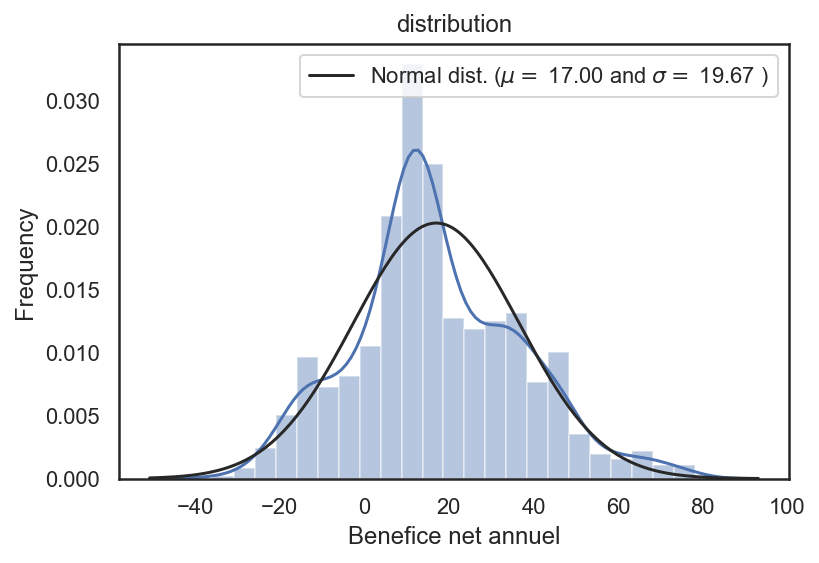

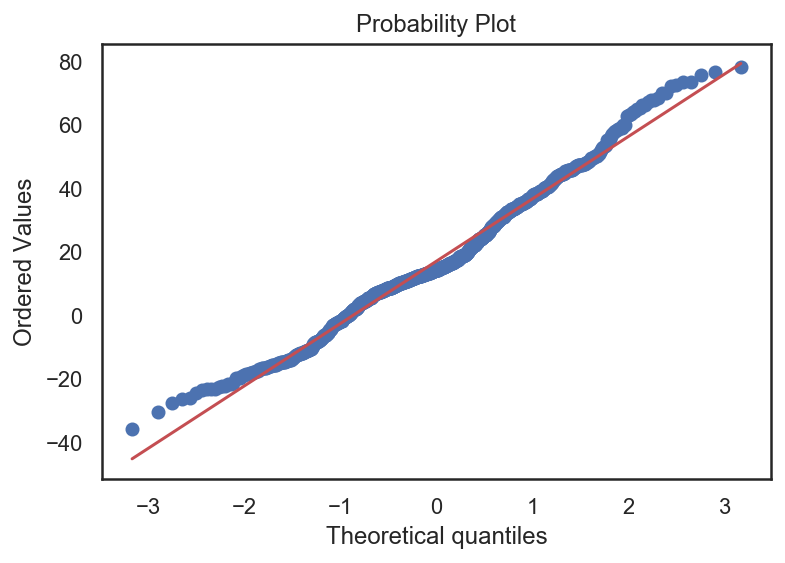

Skewness: 0.325909
Kurtosis: 0.082497


In [28]:
sns.distplot(data['Benefice net annuel'], fit=norm);
(mu, sigma) = norm.fit(data['Benefice net annuel'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('distribution')
fig = plt.figure()
res = stats.probplot(data['Benefice net annuel'],plot=plt)
plt.show()
print("Skewness: %f" % data['Benefice net annuel'].skew())
print("Kurtosis: %f" % data['Benefice net annuel'].kurt())

In [29]:
# data['log_Benefice'] = np.log(data['Benefice net annuel'])
# data = data.drop(['Benefice net annuel'], axis = 1)

## 3.2.2  Variables quantitatives

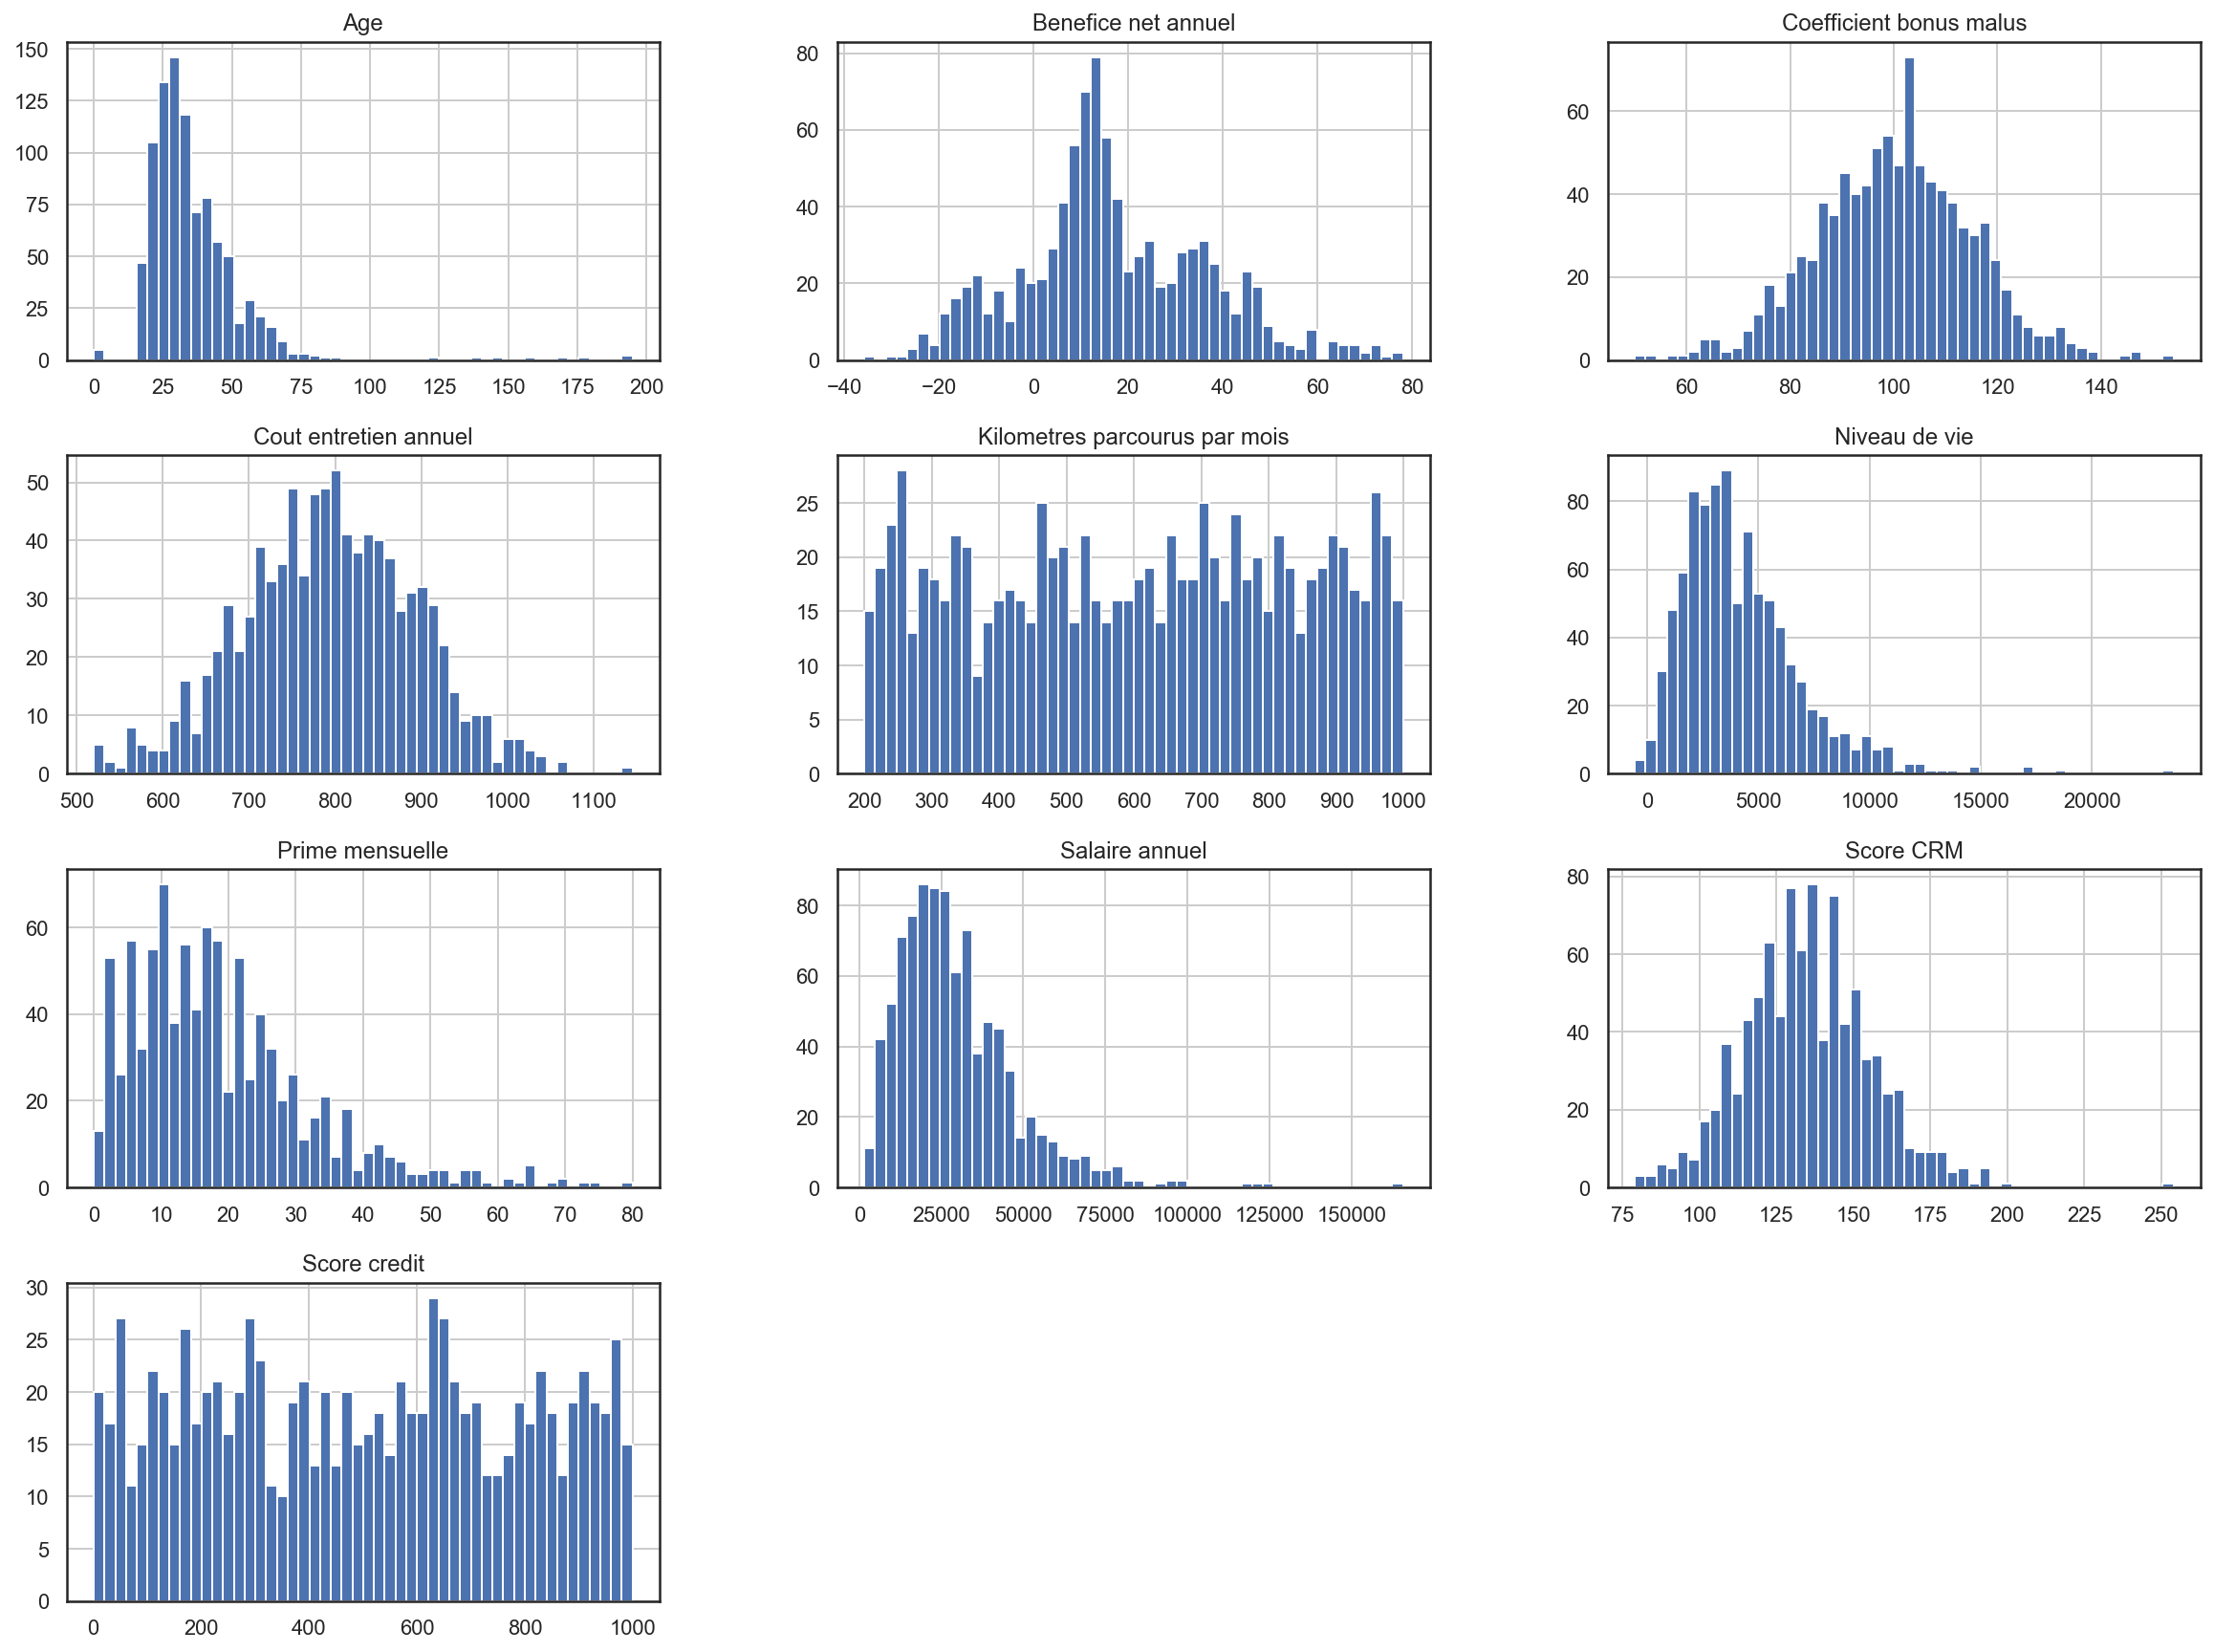

In [40]:
#On visualise les distributions des différentes variables numériques avec des histogrammes 
data.hist(bins=50, figsize=(20, 15))
plt.show()

## 3.2.3  Relation de dépendance

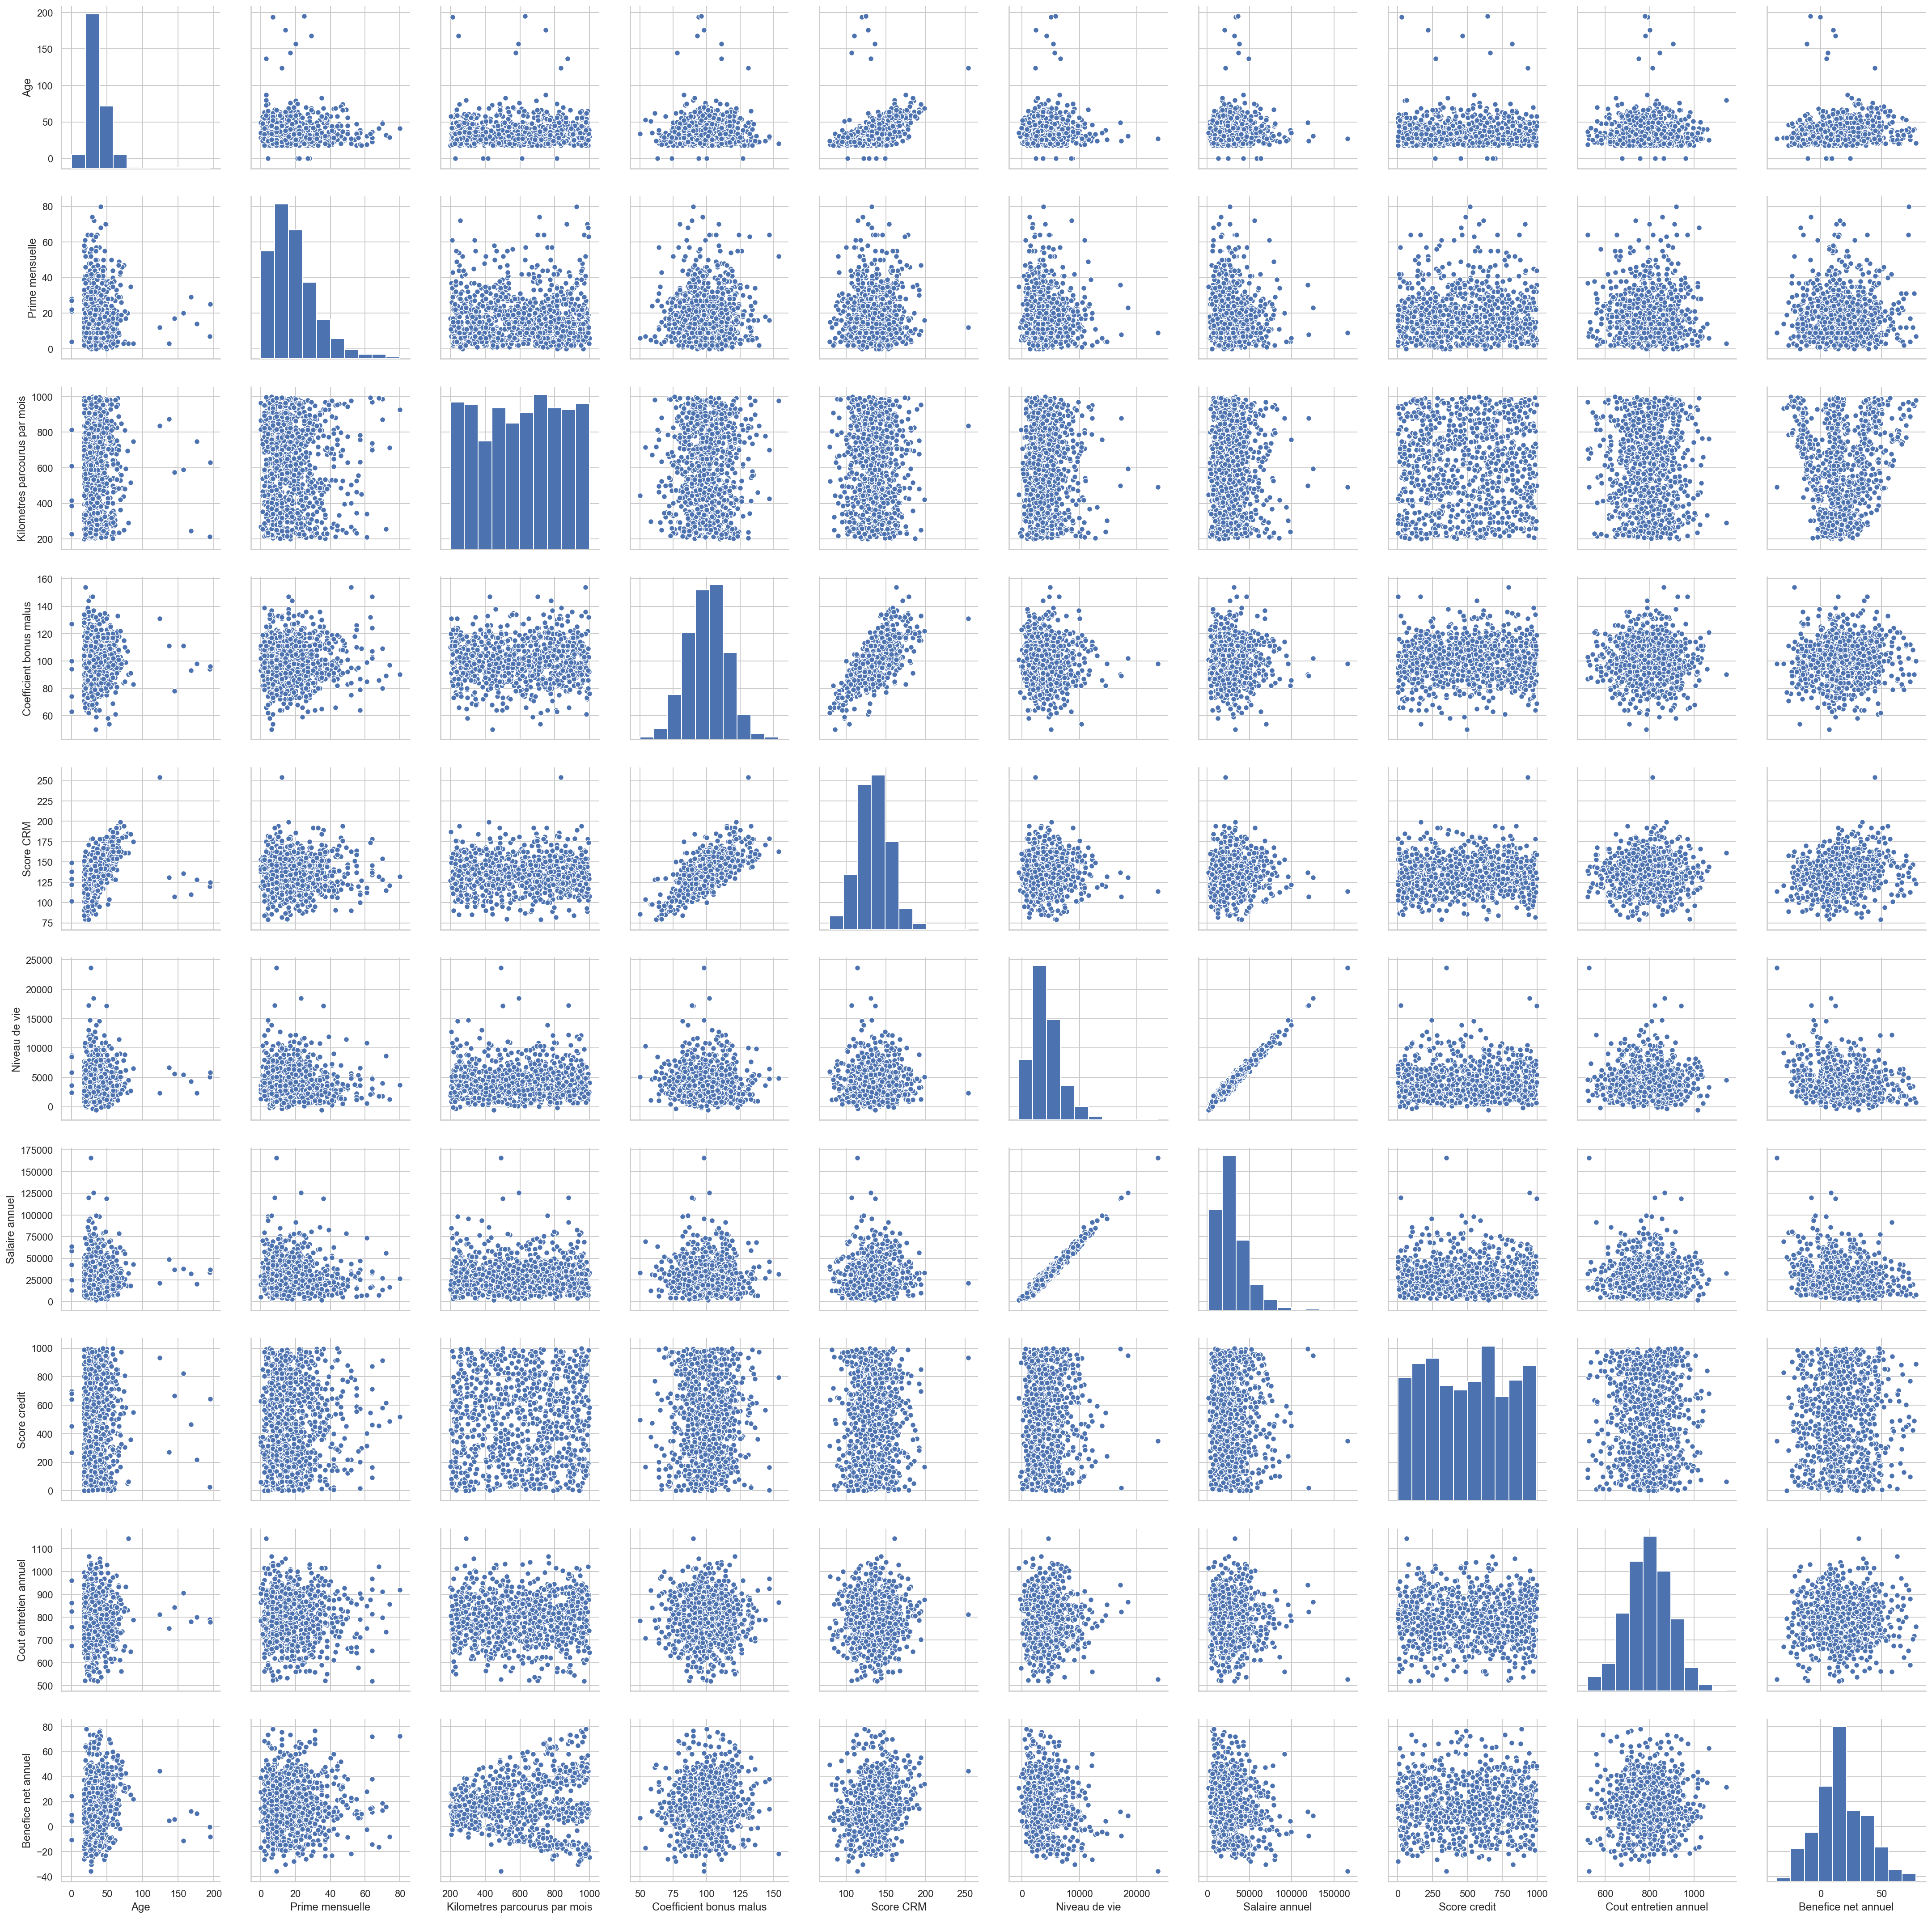

In [41]:
sns.set(style = 'whitegrid',context = 'notebook')
sns.pairplot(data,height=3)
plt.show()

# 3.2.4  Variables qualitatives

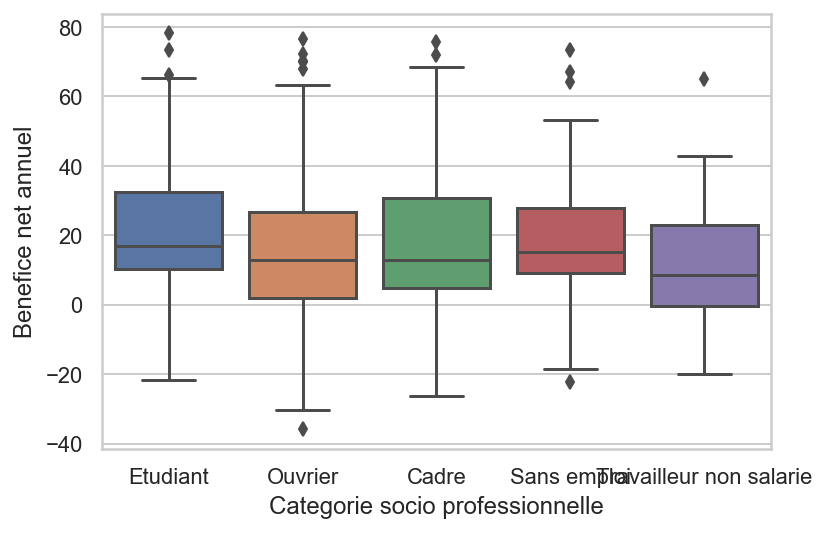

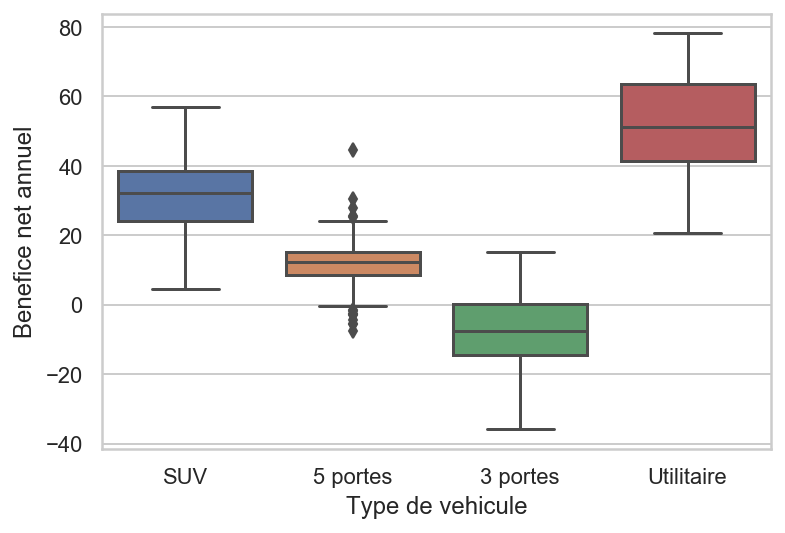

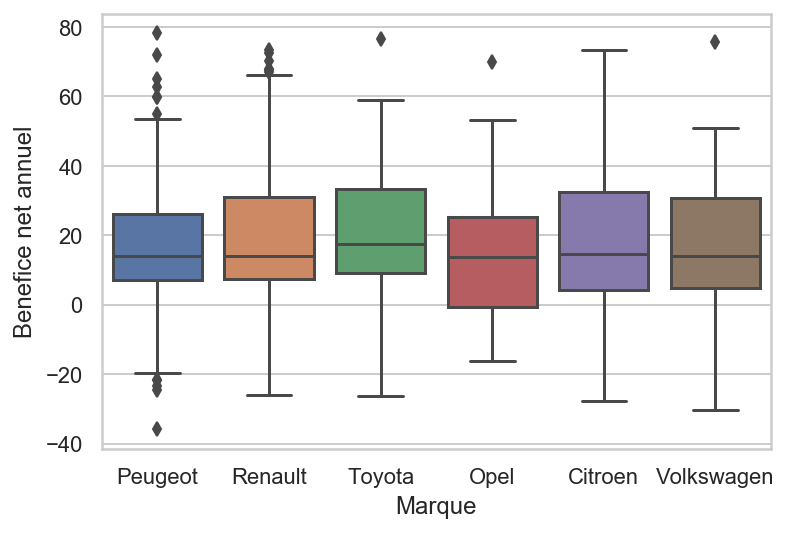

In [43]:
for col_name in data.select_dtypes(object).columns:
    plt.figure()
    sns.boxplot(x=col_name, y="Benefice net annuel", data = data )

## 3.2.5  Corrélation

In [44]:
def heatMap(df, mirror):

   # On calcule la matrice de corrélation
   corr = df.corr()
   # On affiche la figure 
   fig, ax = plt.subplots(figsize=(10, 10))
   # On genère le grille de couleur 
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
   if mirror == True:
      
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
      # xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      # yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
      #show plot

   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
      # Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      # Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
   # show plot
   plt.show()

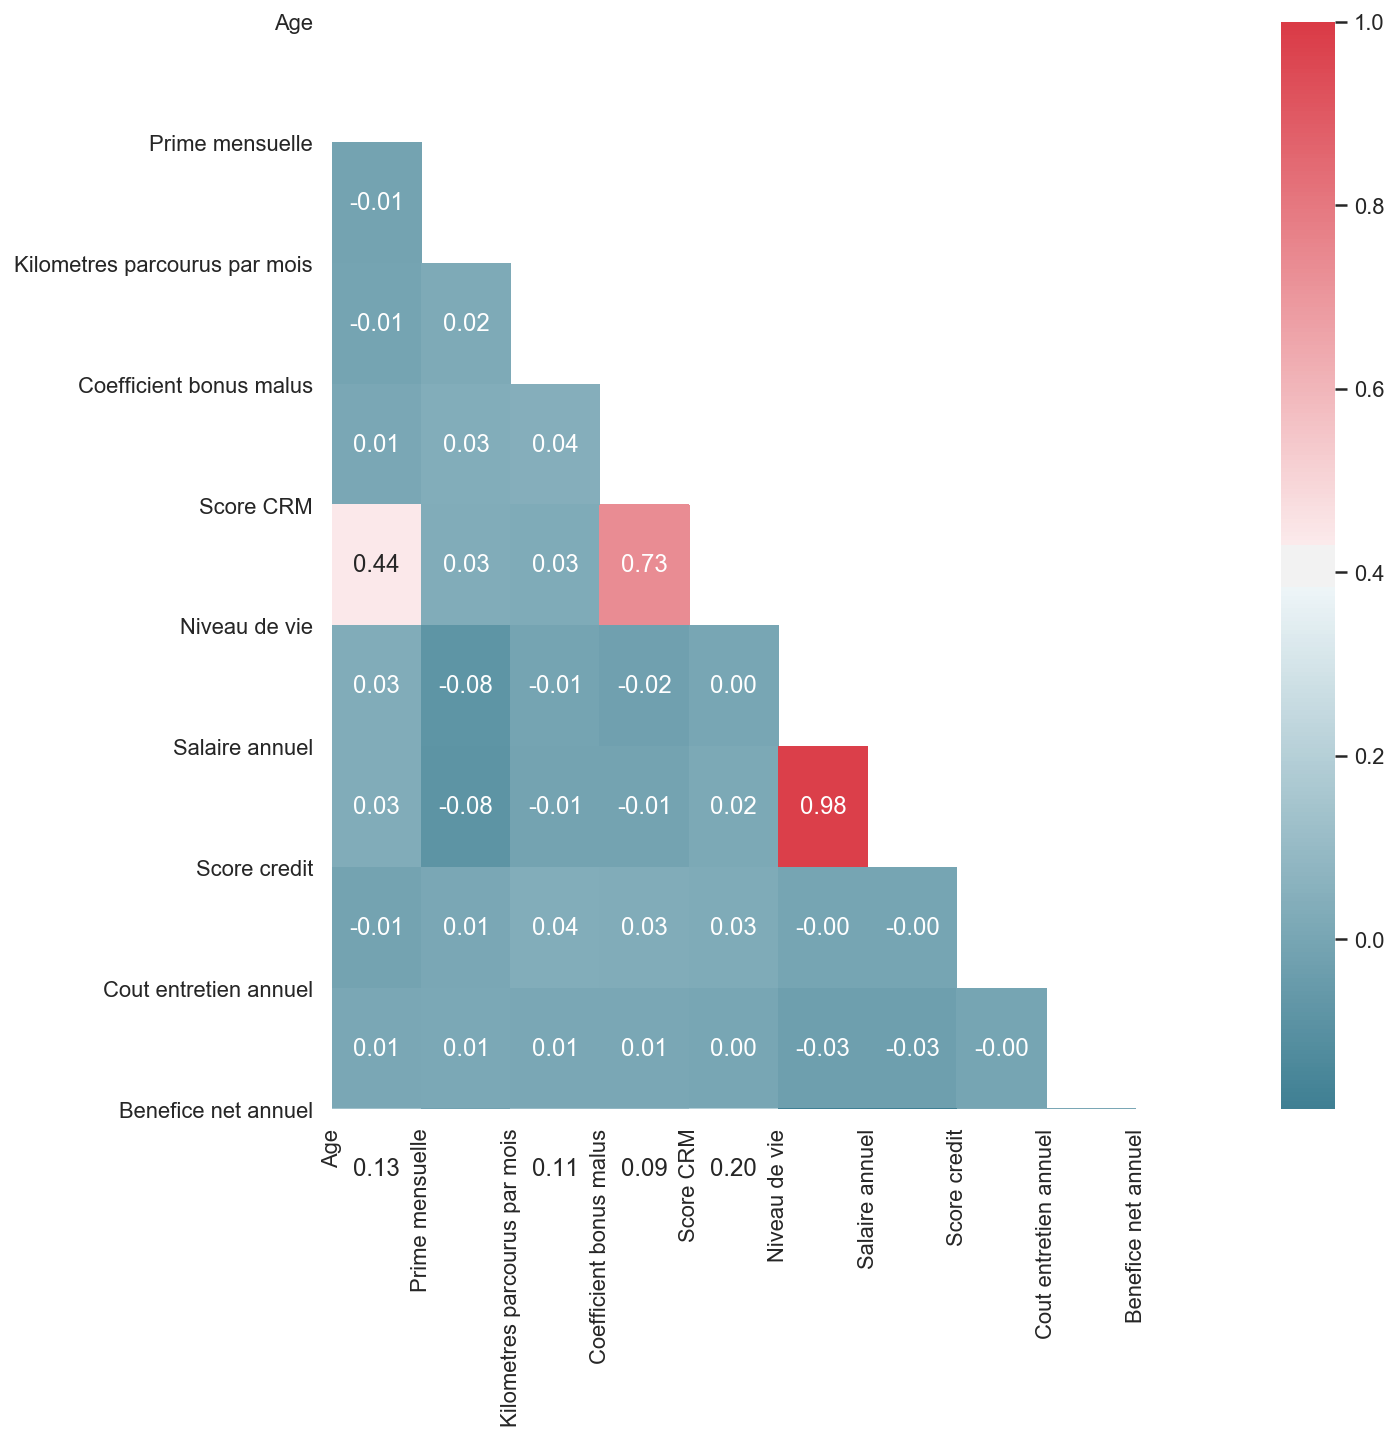

In [45]:
heatMap(data, False )

## 3.2.6  Dummy variables

In [46]:
# On encode les variables non numériques 
for c in data.select_dtypes(object).columns:    
    encoder = LabelEncoder()    
    encoder.fit(list(data[c]))    
    data[c] = encoder.transform(list(data[c]))

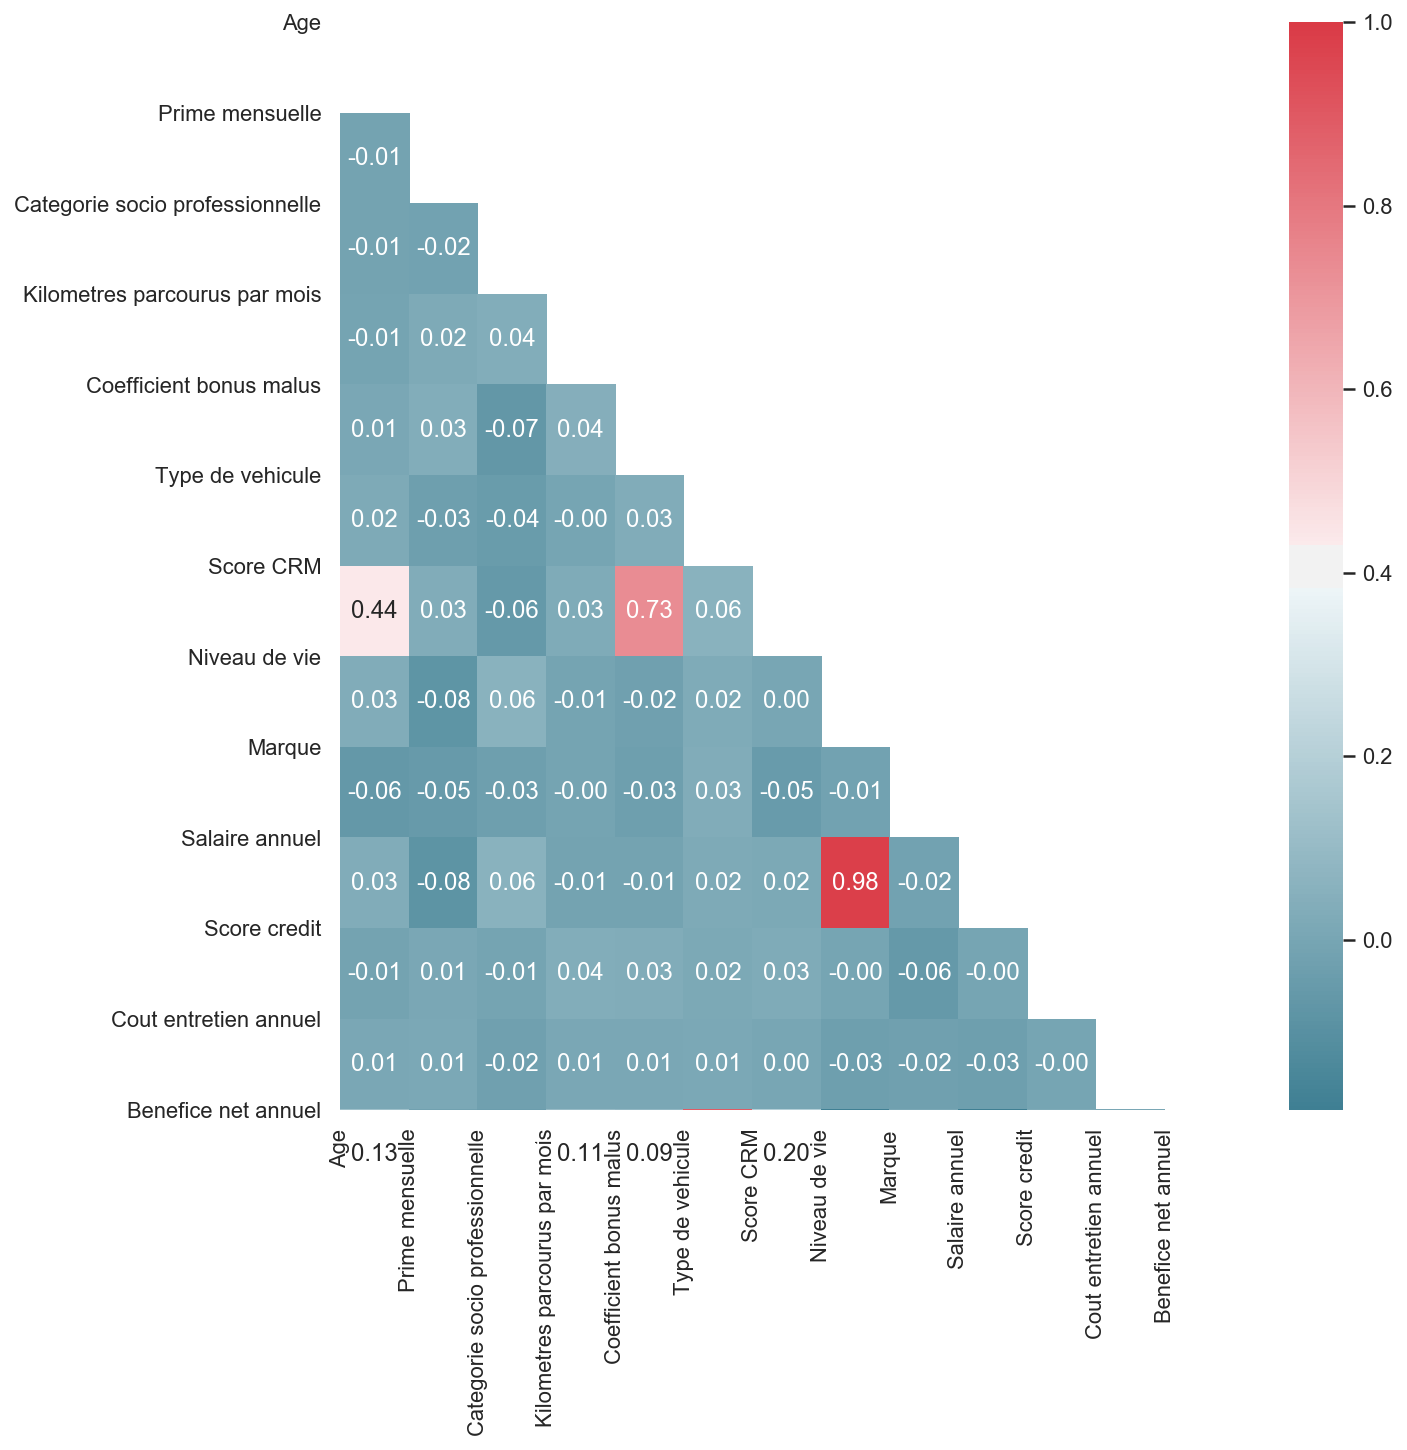

In [47]:
heatMap(data, False )

# 4  Modélisation

In [48]:
# on divise le data set en deux : le jeu d'apprentissage et le jeu de test 
target = data['Benefice net annuel']
data = data.drop(['Benefice net annuel'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 42)

In [49]:
#On définit la métrique utilisée pour évaluer l'algorithme.
def rmse(preds,targets, sample_weight = None, multioutput = 'uniform_average'):
    # on applique la fonction exp afin de revenir au price de départ et avoir une idée réalise de l'erreur 
    preds = np.exp( preds )
    targets =  np.exp(targets)
    return np.sqrt(((preds - targets)**2).mean())

def r2(preds, targets) : 
    # on applique la fonction exp afin de revenir au price de départ et avoir une idée réalise de l'erreur 
    preds = np.exp( preds )
    targets =  np.exp(targets)
    return 1- (np.sum((targets-preds)**2)/  np.sum( ( targets -  np.mean(targets))**2))

In [50]:
def evuluate(model):
    preds_train = model.predict(X_train)
    preds_test = model.predict(X_test)
    # on affiche  preds = f(y)
    plt.figure()
    plt.scatter(y_test, preds_test)  
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Benefice net annuel')
    plt.ylabel('prediction')
    plt.title('pred = f(Benefice net annuel)')
    # les résidus
    plt.figure()
    plt.scatter(y_test, abs(preds_test - y_test))  
    plt.xlabel('preds_Benefice net annuel')
    plt.ylabel('risidual')
    plt.title('risidual = f(fitted_Benefice net annuel)')   
    plt.show()
    rmse_train = rmse(preds_train, y_train)
    rmse_test = rmse(preds_test, y_test)
    r2_train = r2(preds_train, y_train)
    r2_test = r2(preds_test, y_test)   
    return rmse_train, rmse_test, r2_train, r2_test

In [52]:
col_names =  ['model name', 'rmse_train', 'rmse_test','r2_train', 'r2_test']
results = pd.DataFrame(columns = col_names)
results

Empty DataFrame
Columns: [model name, rmse_train, rmse_test, r2_train, r2_test]
Index: []

## 4.1  Régression linéaire

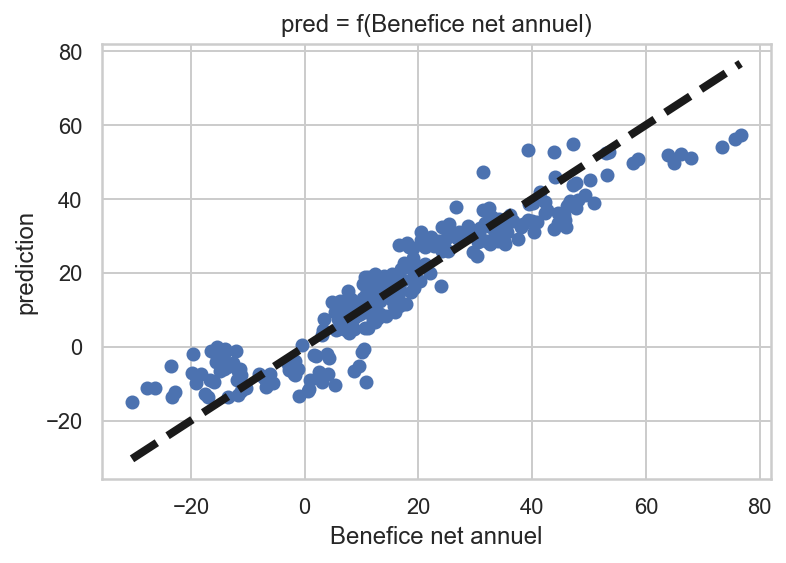

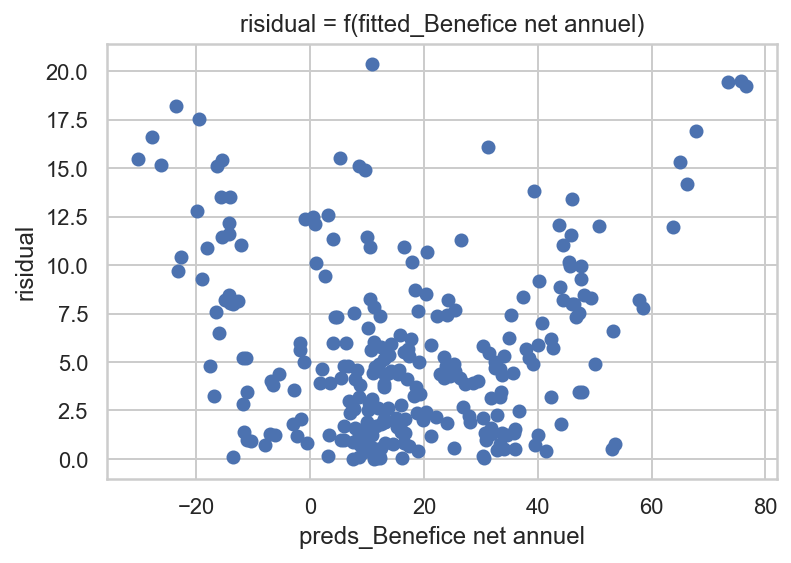

 linear regression train train rmse : 331142042186457544153667192487936.000 test rmse : 123308788328882507920756218789888.000 train r2 : -0.002 test r2  : -0.006


In [55]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
rmse_train, rmse_test, r2_train, r2_test = evuluate(linear_model)
new_row = {'model name':" linear regression", 'rmse_train':rmse_train, 'rmse_test':rmse_test, 'r2_train':r2_train, 'r2_test':r2_test}
results = results.append(new_row, ignore_index=True)
print("{} train train rmse : {:.3f} test rmse : {:.3f} train r2 : {:.3f} test r2  : {:.3f}".format(new_row['model name'],new_row['rmse_train'], new_row['rmse_test'] ,new_row['r2_train'], new_row['r2_test']))

## 4.2  RandomForest

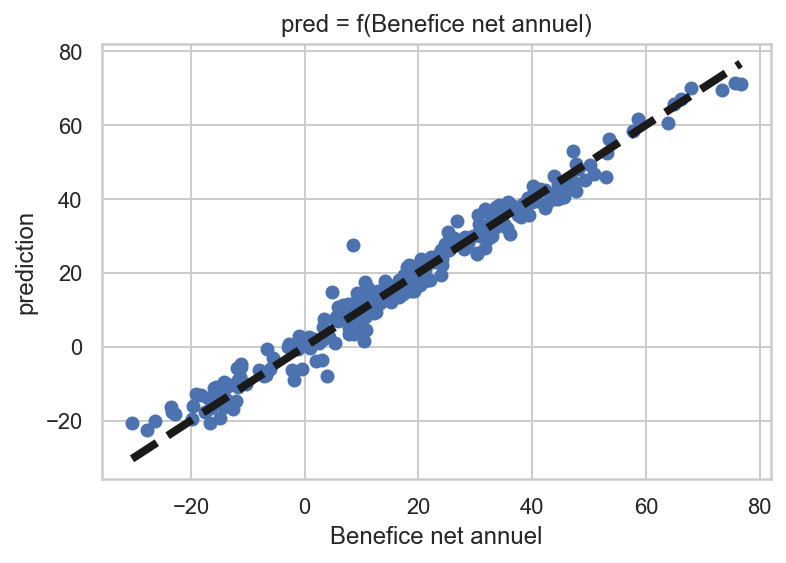

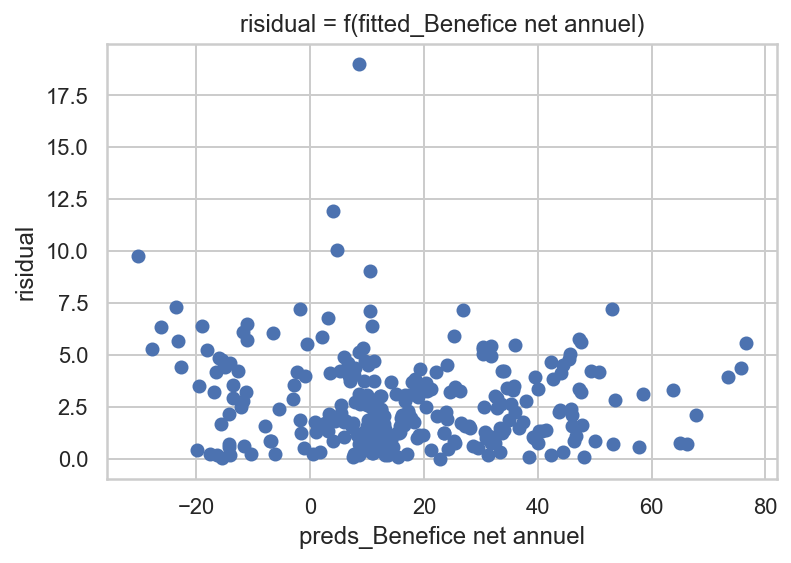

randomForest regressor train train rmse : 330059791080724482322596511088640.000 test rmse : 122693206802269486443304040005632.000 train r2 : 0.005 test r2  : 0.004


In [57]:
from sklearn.ensemble import RandomForestRegressor
randomForest_model = RandomForestRegressor(n_estimators = 150,random_state = 0)
randomForest_model.fit(X_train,y_train)
rmse_train, rmse_test, r2_train, r2_test = evuluate(randomForest_model)
new_row = {'model name':"randomForest regressor", 'rmse_train':rmse_train, 'rmse_test':rmse_test, 'r2_train':r2_train, 'r2_test':r2_test}
results = results.append(new_row, ignore_index=True)
print("{} train train rmse : {:.3f} test rmse : {:.3f} train r2 : {:.3f} test r2  : {:.3f}".format(new_row['model name'],new_row['rmse_train'], new_row['rmse_test'] ,new_row['r2_train'], new_row['r2_test']))


## 4.3  Régression XGboost

[00:44:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


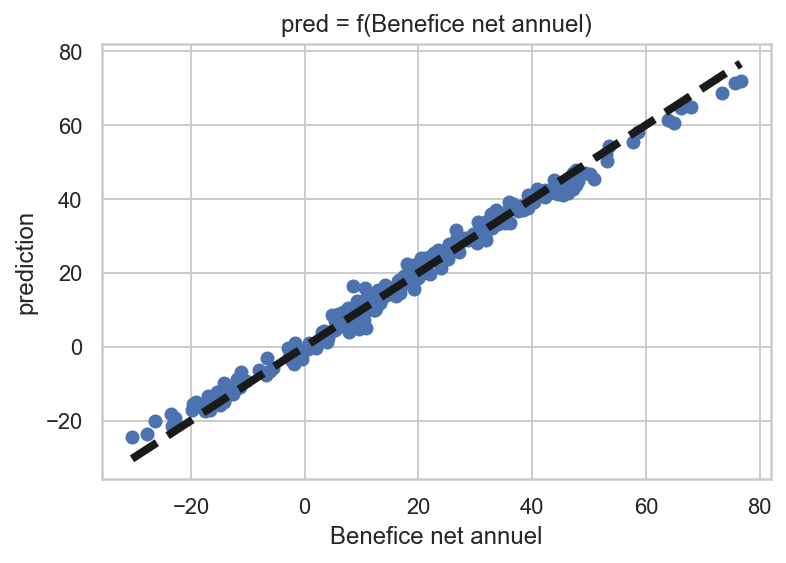

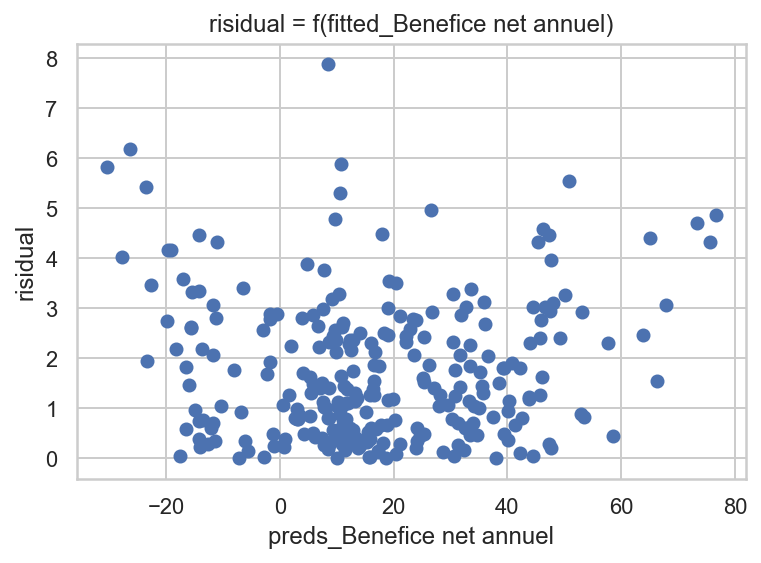

xgboost regressorr train train rmse : 286076139538871200988650341924864.000 test rmse : 122278297654126115898003067764736.000 train r2 : 0.252 test r2  : 0.010


In [60]:
from xgboost.sklearn import XGBRegressor
xgboost_model = XGBRegressor(n_estimators=150,random_state= 0)
xgboost_model.fit(X_train,y_train)
rmse_train, rmse_test, r2_train, r2_test = evuluate(xgboost_model)
new_row = {'model name':"xgboost regressorr", 'rmse_train':rmse_train, 'rmse_test':rmse_test, 'r2_train':r2_train, 'r2_test':r2_test}
results = results.append(new_row, ignore_index=True)
print("{} train train rmse : {:.3f} test rmse : {:.3f} train r2 : {:.3f} test r2  : {:.3f}".format(new_row['model name'],new_row['rmse_train'], new_row['rmse_test'] ,new_row['r2_train'], new_row['r2_test']))

## 4.4  Comparaison des résultats avant tuning des paramètres.

In [61]:
results

model name    rmse_train     rmse_test  r2_train   r2_test
0       linear regression  3.311420e+32  1.233088e+32 -0.001600 -0.006399
1  randomForest regressor  3.300598e+32  1.226932e+32  0.004937  0.003625
2      xgboost regressorr  2.860761e+32  1.222783e+32  0.252470  0.010352

## 4.5  Turning des hyperparamètres

## 4.5.1  RandomForest

In [62]:
# On prépare la liste des hyperparamètres.
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 30, num = 3)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# On crée  randomgrid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [63]:
# Tuning hyper-parameters by RandomizedSearchCV
tune_rf = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid, n_iter = 200, cv = 4, scoring = 'neg_mean_squared_error', verbose=2, random_state = 167, n_jobs = -1)
tune_rf.fit(X_train, y_train)

Fitting 4 folds for each of 200 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  5.3min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [64]:
tune_rf.best_params_

{'n_estimators': 595,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 16,
 'bootstrap': True}

Name: xgboost regressorr train score : 2.860761395388712e+32 test score : 1.2227829765412612e+32


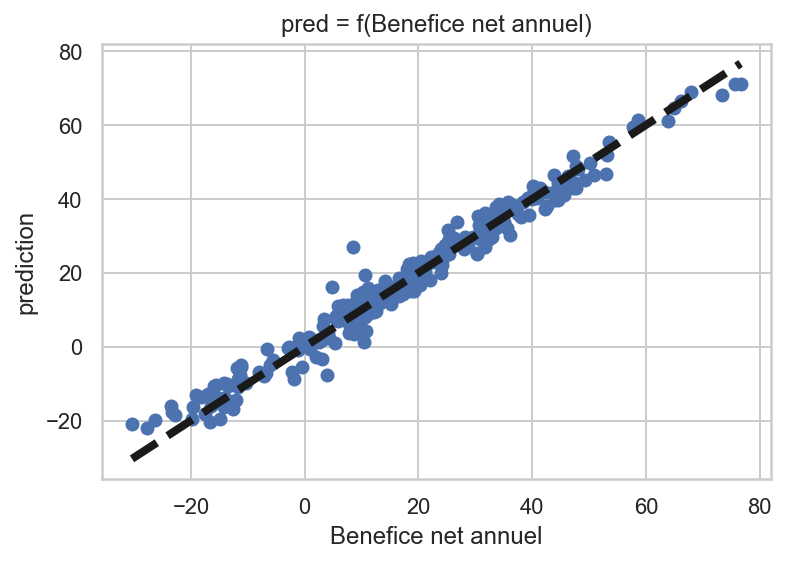

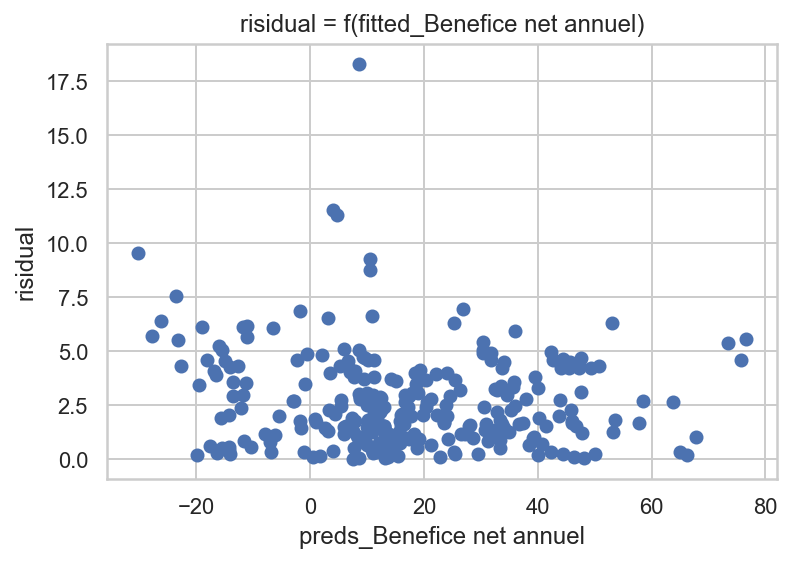

tuned_randomForest regressor train train rmse : 330057349135557118002103670800384.000 test rmse : 122741812845235006508339182960640.000 train r2 : 0.005 test r2  : 0.003


In [65]:
# on stocke le score du meilleur estimateur 
best_estimator  =  tune_rf.best_estimator_ 
print("Name: {} train score : {} test score : {}".format(new_row['model name'],new_row['rmse_train'], new_row['rmse_test']))
rmse_train, rmse_test, r2_train, r2_test = evuluate(best_estimator)
new_row = {'model name':"tuned_randomForest regressor", 'rmse_train':rmse_train, 'rmse_test':rmse_test, 'r2_train':r2_train, 'r2_test':r2_test}
results = results.append(new_row, ignore_index=True)
print("{} train train rmse : {:.3f} test rmse : {:.3f} train r2 : {:.3f} test r2  : {:.3f}".format(new_row['model name'],new_row['rmse_train'], new_row['rmse_test'] ,new_row['r2_train'], new_row['r2_test']))

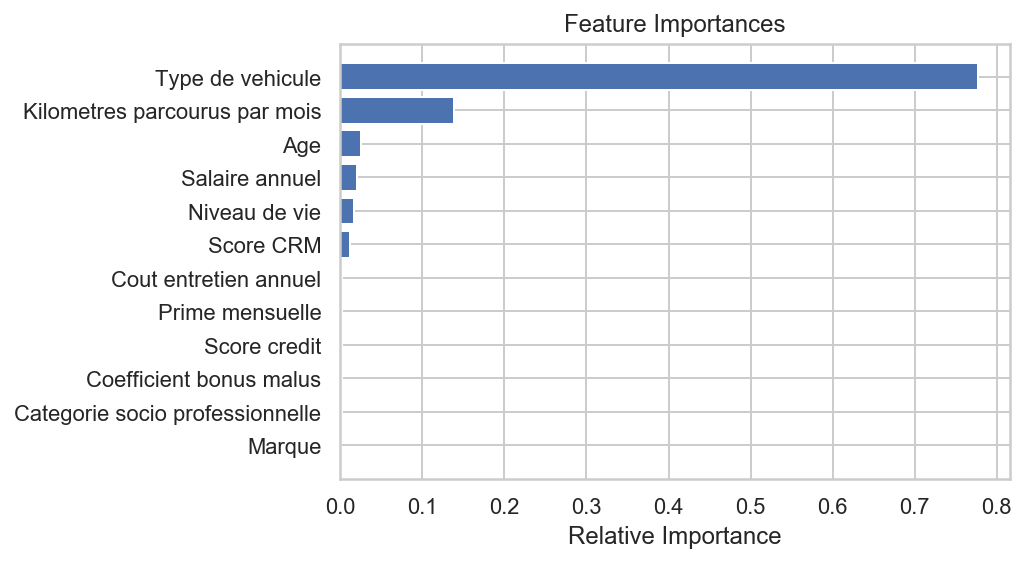

In [66]:
features = data.columns
importances = best_estimator.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [68]:
# Tuning hyper-parameters by GridSearchCV
param_grid = {'max_depth': [int(x) for x in np.linspace(3, 30, 3)],
              'min_child_weight': [1, 3, 5],
              'subsample': [i/10.0 for i in range(6, 10)],
              }
tuned_xgboost  = GridSearchCV(estimator = XGBRegressor(learning_rate = 0.1, n_estimators = 200, colsample_bytree = 0.8, objective= 'reg:linear', 
                                            nthread = 4, scale_pos_weight = 1, seed = 27), param_grid = param_grid, scoring = 'neg_mean_squared_error',
                                            n_jobs = -1, iid = False, cv = 4)
tuned_xgboost.fit(X_train, y_train)

[01:01:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=200, n_jobs=1, nthread=4,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=27, silent=None,
                                    subsample=1, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': [3, 16, 30],
                         'min_child_weight': [1, 3, 5],
                     

In [69]:
tuned_xgboost.best_params_

{'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.7}

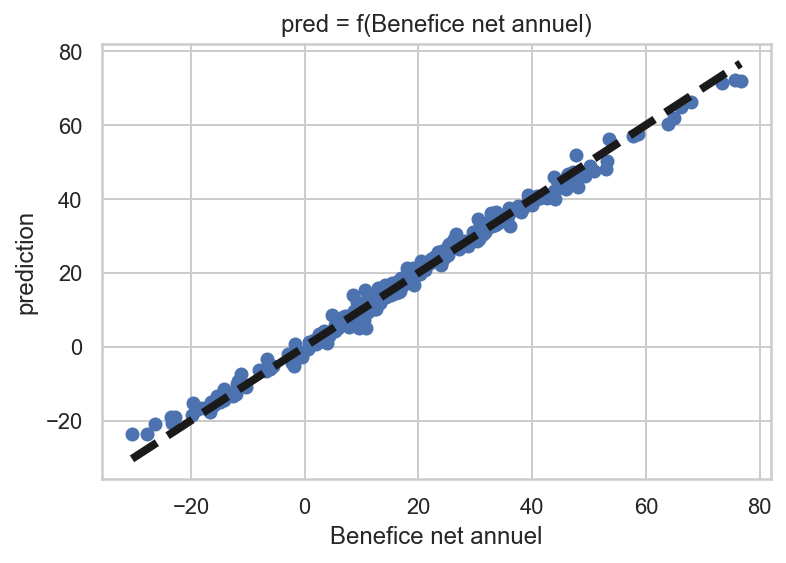

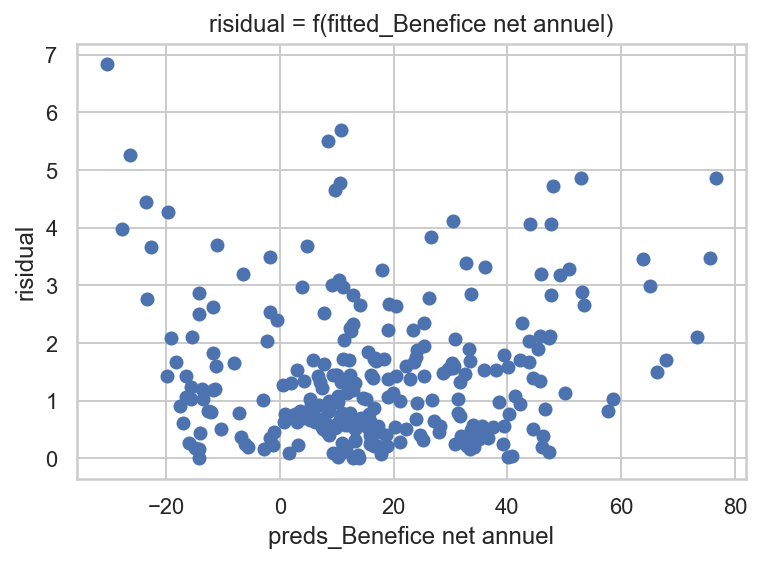

tuned XGboost regressor train train rmse : 254234962802394548610734214873088.000 test rmse : 121968843180120555631751492272128.000 train r2 : 0.410 test r2  : 0.015


In [70]:
# on stocke le score du meilleur estimateur 
best_estimator  =  tuned_xgboost.best_estimator_ 
rmse_train, rmse_test, r2_train, r2_test = evuluate(best_estimator)
new_row = {'model name':"tuned XGboost regressor", 'rmse_train':rmse_train, 'rmse_test':rmse_test, 'r2_train':r2_train, 'r2_test':r2_test}
results = results.append(new_row, ignore_index=True)
print("{} train train rmse : {:.3f} test rmse : {:.3f} train r2 : {:.3f} test r2  : {:.3f}".format(new_row['model name'],new_row['rmse_train'], new_row['rmse_test'] ,new_row['r2_train'], new_row['r2_test']))

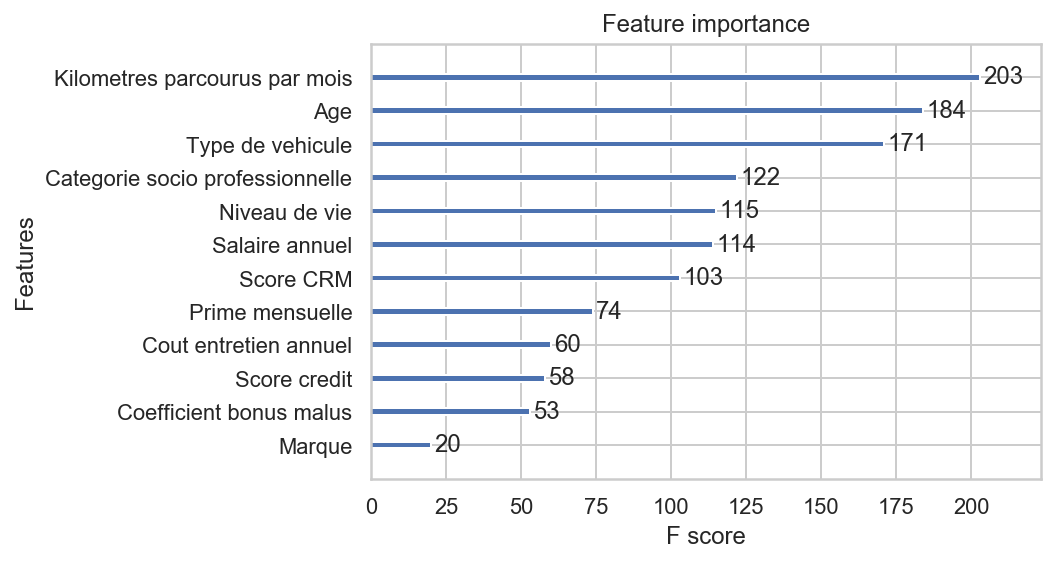

In [74]:
#Importance des variables 
import xgboost
xgboost.plot_importance(best_estimator,max_num_features=20)
plt.show()

## 4.5.2  Ridge Regression (Linear Regression with L2 regularization)

In [76]:
from sklearn.linear_model import Ridge
params = {'alpha': [i for i in range(100)]}
reg = GridSearchCV(Ridge(), param_grid = params, cv = 4, scoring = 'neg_mean_squared_error')
reg.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                   14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                   25, 26, 27, 28, 29, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

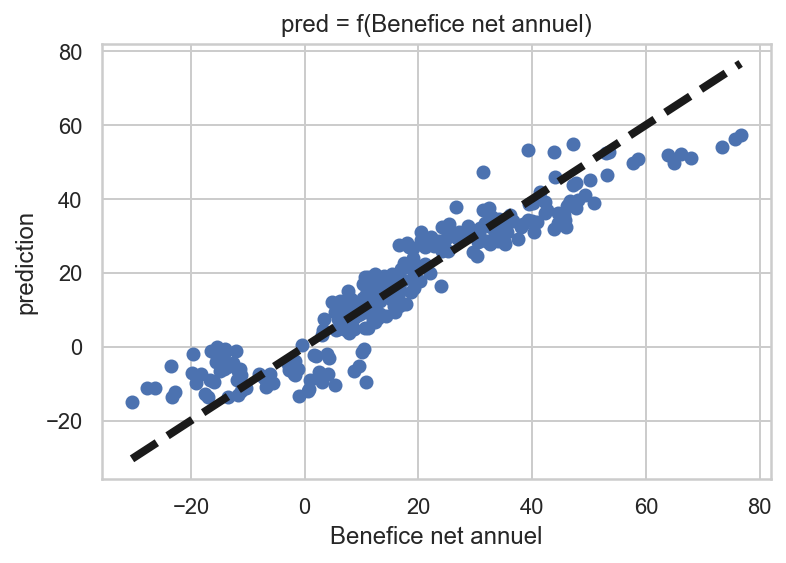

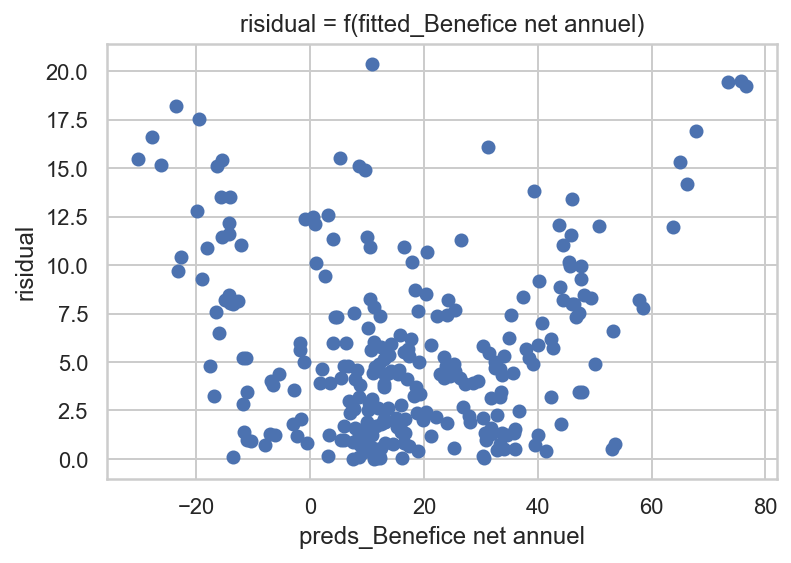

tuned Ridge regressor train train rmse : 331142042186457544153667192487936.000 test rmse : 123308788328882507920756218789888.000 train r2 : -0.002 test r2  : -0.006


In [77]:
# on stocke le score du meilleur estimateur 
best_estimator  =  reg.best_estimator_ 
rmse_train, rmse_test, r2_train, r2_test = evuluate(best_estimator)
new_row = {'model name':"tuned Ridge regressor", 'rmse_train':rmse_train, 'rmse_test':rmse_test, 'r2_train':r2_train, 'r2_test':r2_test}
results = results.append(new_row, ignore_index=True)
print("{} train train rmse : {:.3f} test rmse : {:.3f} train r2 : {:.3f} test r2  : {:.3f}".format(new_row['model name'],new_row['rmse_train'], new_row['rmse_test'] ,new_row['r2_train'], new_row['r2_test']))

## 4.5.3  Lasso (Linear Regression with L1 regularization)

In [79]:
from sklearn.linear_model import Lasso
reg = GridSearchCV(Lasso(), param_grid = params, cv = 4, scoring = 'neg_mean_squared_error')
reg.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                   14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                   25, 26, 27, 28, 29, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

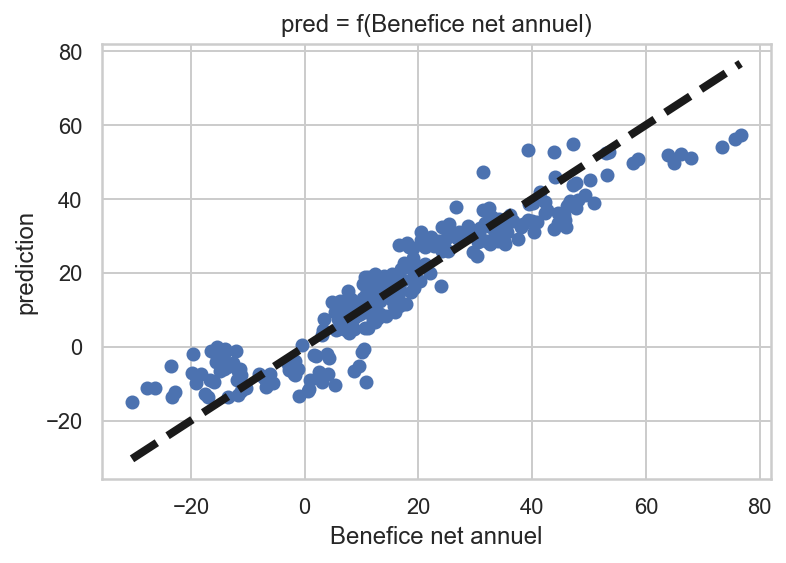

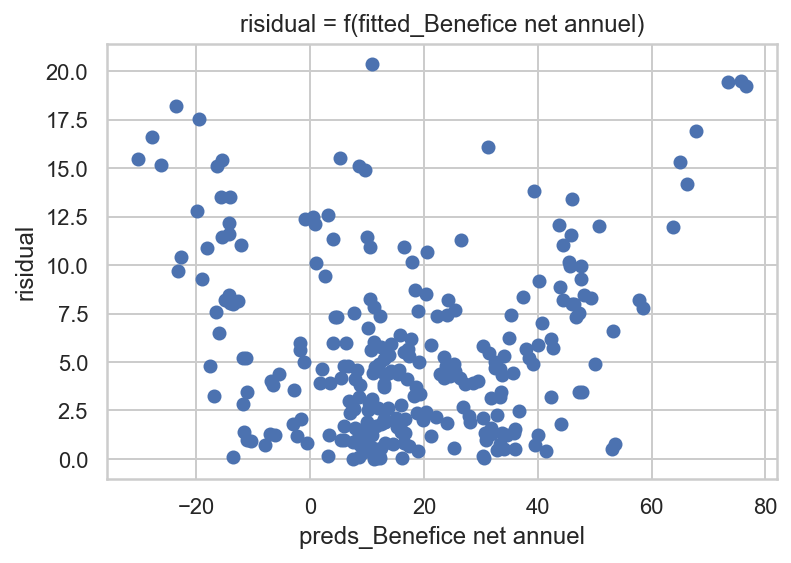

tuned Lasso regressor train train rmse : 331142042186457544153667192487936.000 test rmse : 123308788328882507920756218789888.000 train r2 : -0.002 test r2  : -0.006


In [80]:
# on stocke le score du meilleur estimateur 
best_estimator  =  reg.best_estimator_ 
rmse_train, rmse_test, r2_train, r2_test = evuluate(best_estimator)
new_row = {'model name':"tuned Lasso regressor", 'rmse_train':rmse_train, 'rmse_test':rmse_test, 'r2_train':r2_train, 'r2_test':r2_test}
results = results.append(new_row, ignore_index=True)
print("{} train train rmse : {:.3f} test rmse : {:.3f} train r2 : {:.3f} test r2  : {:.3f}".format(new_row['model name'],new_row['rmse_train'], new_row['rmse_test'] ,new_row['r2_train'], new_row['r2_test']))

## 4.6  Comparaison des résulats après tuning

In [81]:
# on tri par score obtenu sur le jeu d'entrainement.
results =  results.sort_values(['rmse_test'], ascending = 1)
results

model name    rmse_train     rmse_test  r2_train  \
4       tuned XGboost regressor  2.542350e+32  1.219688e+32  0.409614   
2            xgboost regressorr  2.860761e+32  1.222783e+32  0.252470   
1        randomForest regressor  3.300598e+32  1.226932e+32  0.004937   
3  tuned_randomForest regressor  3.300573e+32  1.227418e+32  0.004951   
0             linear regression  3.311420e+32  1.233088e+32 -0.001600   
5         tuned Ridge regressor  3.311420e+32  1.233088e+32 -0.001600   
6         tuned Lasso regressor  3.311420e+32  1.233088e+32 -0.001600   

    r2_test  
4  0.015355  
2  0.010352  
1  0.003625  
3  0.002835  
0 -0.006399  
5 -0.006399  
6 -0.006399

In [101]:
file = path+'scoring_dataset_axaggpdsc.csv'
data2 = pd.read_csv(file, sep= ',', encoding='latin-1', index_col=0)




In [102]:
data2.describe()

Age  Prime mensuelle  Kilometres parcourus par mois  \
count  295.000000       298.000000                     300.000000   
mean    34.264407        18.315436                     603.843333   
std     14.596544        13.288352                     236.220205   
min      0.000000         0.000000                     200.000000   
25%     25.000000         9.000000                     404.000000   
50%     32.000000        15.000000                     590.000000   
75%     41.000000        24.750000                     808.250000   
max    169.000000        69.000000                     994.000000   

       Coefficient bonus malus   Score CRM  Niveau de vie  Salaire annuel  \
count               300.000000  300.000000     300.000000      300.000000   
mean                100.713333  134.343333    4276.910000    29967.866667   
std                  14.835029   18.014453    2570.824759    17725.924728   
min                  61.000000   89.000000     208.000000     2410.000000   
25%                  91.750000  122.000000    2372.500000    16745.000000   
50%                 101.000000  134.000000    3831.000000    27475.000000   
75%                 110.000000  145.250000    5589.750000    39370.000000   
max                 143.000000  196.000000   19586.000000   133980.000000   

       Score credit  Cout entretien annuel  
count    300.000000             300.000000  
mean     493.966667             790.280000  
std      276.320216             102.691936  
min        6.000000             552.000000  
25%      269.750000             718.750000  
50%      512.500000             788.500000  
75%      709.000000             855.250000  
max      991.000000            1099.000000

In [103]:

# On encode les variables non numériques 
for c in data2.select_dtypes(object).columns:    
    encoder = LabelEncoder()    
    encoder.fit(list(data2[c]))    
    data2[c] = encoder.transform(list(data2[c]))

In [104]:
Benefice=list(tuned_xgboost.predict(data2))

In [105]:
data2['Benifice'] = Benefice

In [106]:
export_csv = data2.to_csv(path+'export.csv')

# 5  Conclusion

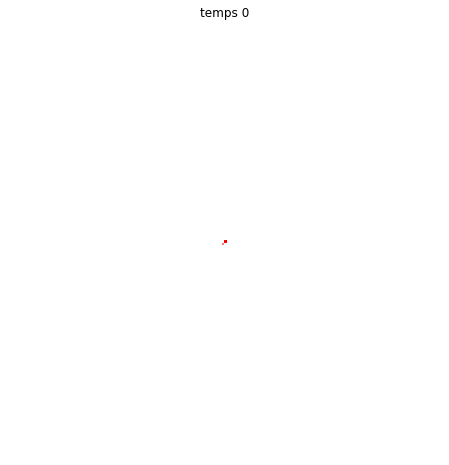